In [5]:
# https://www.kaggle.com/datasets/pratyushpuri/remote-work-health-impact-survey-2025?select=post_pandemic_remote_work_health_impact_2025.csv

# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

dataset_name = "pratyushpuri/remote-work-health-impact-survey-2025"

# Nazwa pliku (z poprawnym rozszerzeniem .csv)
file_path = "post_pandemic_remote_work_health_impact_2025.csv"

# Wczytanie danych
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    dataset_name,
    file_path
)

# Podgląd danych
print(df.head())


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: C:\Users\piecz\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip
C:\Users\piecz\AppData\Local\Temp\ipykernel_1740\859133166.py:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 373k/373k [00:00<00:00, 790kB/s]

  Survey_Date  Age  Gender         Region               Industry  \
0  2025-06-01   27  Female           Asia  Professional Services   
1  2025-06-01   37  Female           Asia  Professional Services   
2  2025-06-01   32  Female         Africa              Education   
3  2025-06-01   40  Female         Europe              Education   
4  2025-06-01   30    Male  South America          Manufacturing   

           Job_Role Work_Arrangement  Hours_Per_Week Mental_Health_Status  \
0      Data Analyst           Onsite              64      Stress Disorder   
1      Data Analyst           Onsite              37      Stress Disorder   
2  Business Analyst           Onsite              36                 ADHD   
3      Data Analyst           Onsite              63                 ADHD   
4   DevOps Engineer           Hybrid              65                  NaN   

  Burnout_Level  Work_Life_Balance_Score     Physical_Health_Issues  \
0          High                        3   Shoulder Pain;

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [7]:
display(df)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2025-06-26,62,Female,South America,Professional Services,Data Analyst,Hybrid,38,PTSD,Medium,4,Shoulder Pain; Neck Pain,3,$80K-100K
3153,2025-06-26,24,Female,South America,Professional Services,Software Engineer,Remote,54,NaN,Medium,4,Eye Strain,4,$100K-120K
3154,2025-06-26,45,Female,North America,Professional Services,HR Manager,Onsite,59,PTSD,Medium,1,Shoulder Pain,3,$40K-60K
3155,2025-06-26,38,Male,North America,Education,Operations Manager,Onsite,52,Depression,Medium,3,Shoulder Pain; Eye Strain; Neck Pain,5,$80K-100K


In [12]:
df.groupby("Job_Role")["Work_Life_Balance_Score"].mean()
df.groupby("Industry")["Work_Life_Balance_Score"].mean()
df.groupby("Gender")["Work_Life_Balance_Score"].mean()

df.groupby("Job_Role")["Mental_Health_Status"].count()

Job_Role
Account Manager                 100
Business Analyst                 96
Consultant                       97
Content Writer                   90
Customer Service Manager        106
Data Analyst                    103
Data Scientist                  104
DevOps Engineer                 112
Digital Marketing Specialist     82
Executive Assistant              89
Financial Analyst                77
HR Manager                      109
IT Support                      108
Marketing Specialist             86
Operations Manager              104
Product Manager                 106
Project Manager                 100
Quality Assurance               107
Research Scientist              114
Sales Representative             86
Social Media Manager            106
Software Engineer                97
Technical Writer                 79
UX Designer                     100
Name: Mental_Health_Status, dtype: int64

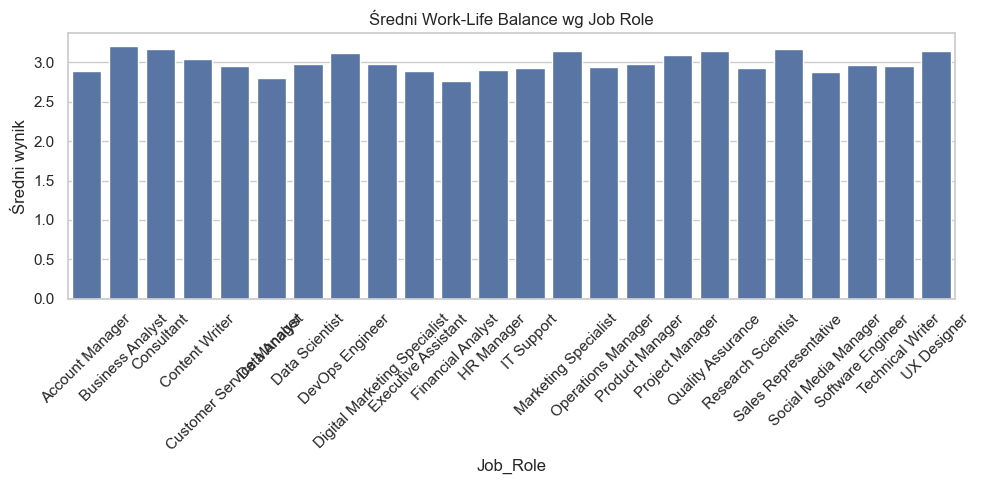

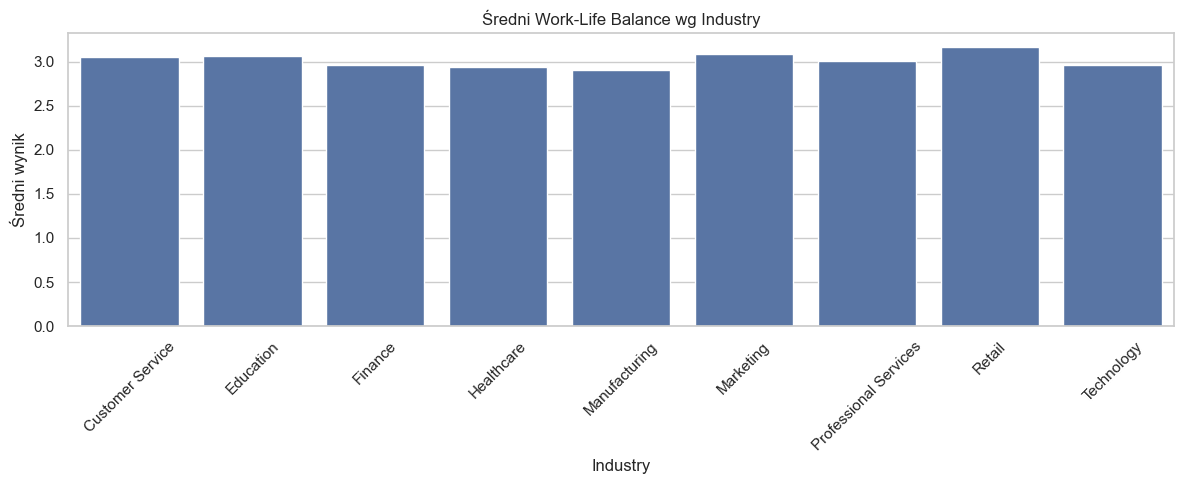

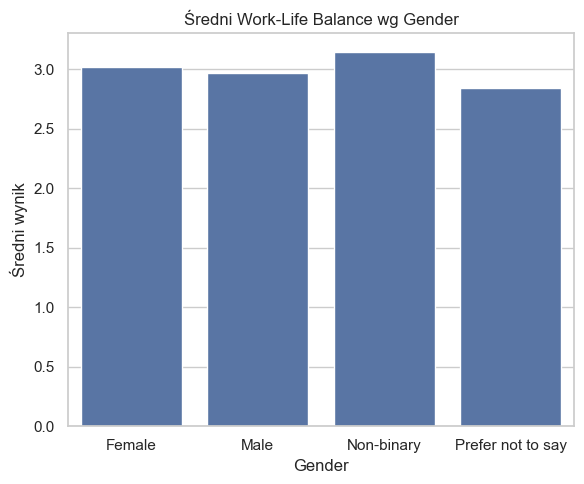

In [19]:
sns.set(style="whitegrid")

# Wykres 1 – wg Job_Role
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby("Job_Role")["Work_Life_Balance_Score"].mean().index,
            y=df.groupby("Job_Role")["Work_Life_Balance_Score"].mean().values)
plt.title("Średni Work-Life Balance wg Job Role")
plt.ylabel("Średni wynik")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wykres 2 – wg Industry
plt.figure(figsize=(12, 5))
sns.barplot(x=df.groupby("Industry")["Work_Life_Balance_Score"].mean().index,
            y=df.groupby("Industry")["Work_Life_Balance_Score"].mean().values)
plt.title("Średni Work-Life Balance wg Industry")
plt.ylabel("Średni wynik")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wykres 3 – wg Gender
plt.figure(figsize=(6, 5))
sns.barplot(x=df.groupby("Gender")["Work_Life_Balance_Score"].mean().index,
            y=df.groupby("Gender")["Work_Life_Balance_Score"].mean().values)
plt.title("Średni Work-Life Balance wg Gender")
plt.ylabel("Średni wynik")
plt.tight_layout()
plt.show()

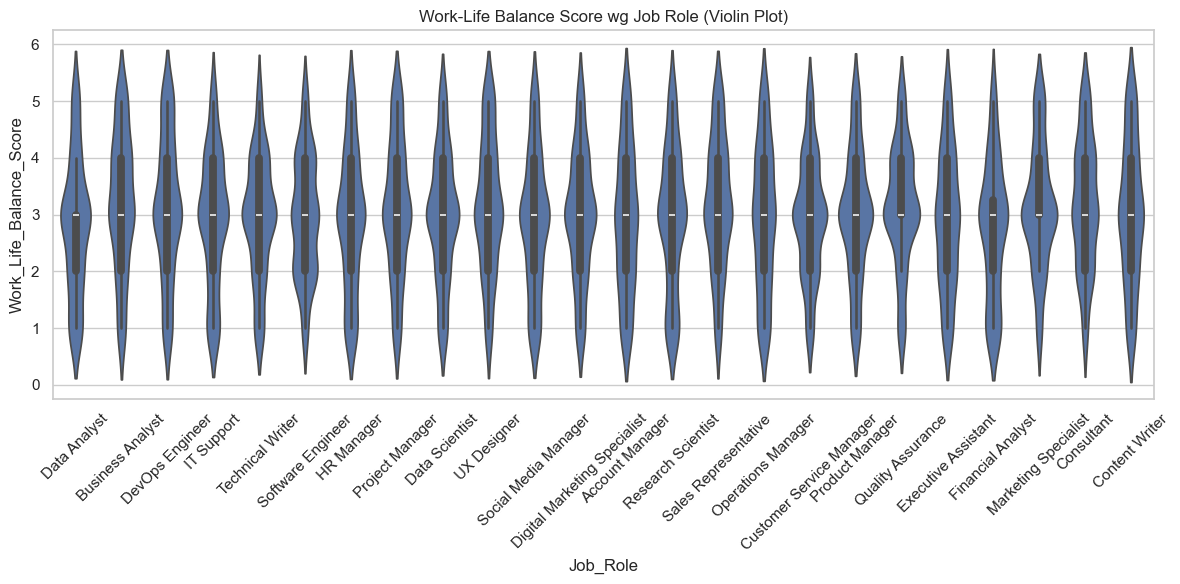

In [22]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Job_Role", y="Work_Life_Balance_Score", inner="box")
plt.title("Work-Life Balance Score wg Job Role (Violin Plot)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
counts = df.groupby(["Job_Role", "Mental_Health_Status"]).size().unstack(fill_value=0)

# Oblicz procenty w obrębie każdej grupy zawodowej
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Zaokrąglij do 1 miejsca po przecinku
percentages = percentages.round(1)

# Wyświetl wynik
display(percentages)

Mental_Health_Status,ADHD,Anxiety,Burnout,Depression,PTSD,Stress Disorder
Job_Role,,,,,,
Account Manager,21.0,13.0,17.0,11.0,21.0,17.0
Business Analyst,20.8,15.6,20.8,13.5,17.7,11.5
Consultant,12.4,18.6,18.6,18.6,16.5,15.5
Content Writer,18.9,13.3,14.4,21.1,23.3,8.9
Customer Service Manager,15.1,17.9,22.6,17.9,13.2,13.2
Data Analyst,19.4,20.4,17.5,12.6,10.7,19.4
Data Scientist,21.2,18.3,14.4,13.5,14.4,18.3
DevOps Engineer,14.3,17.9,16.1,18.8,17.0,16.1
Digital Marketing Specialist,17.1,15.9,11.0,14.6,17.1,24.4
